<a href="https://colab.research.google.com/github/braverobot/pub_learning_playbooks/blob/master/project_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer Vision Project- Seedling Classification
Project Description – Image classification using CNNs in Keras
 Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.
Dataset:
The dataset can be download from Olympus. The data file names are:
 images.npy
 Label.csv
The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.
The following code was used to convert the large dataset of images to numpy array:
  
# Import necessary libraries.
import math
import numpy as np
import pandas as pd
from glob import glob
data_path = '/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip'
!mkdir dataset
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.) from zipfile import ZipFile
with ZipFile(data_path, 'r') as zip:
zip.extractall('./dataset')
path = "/content/dataset/*/*.*" # The path to all images in training set. (* means include all folder s and files.)
files = glob(path)
trainImg = [] trainLabel = [] j=1
num = len(files)
# Initialize empty list to store the image data as numbers. # Initialize empty list to store the labels of images
# Obtain images and resizing, obtain labels
for img in files:
    '''
Append the image data to trainImg list.
Append the labels to trainLabel list.
'''
print(str(j) + "/" + str(num), end="\r")
trainImg.append(cv2.resize(cv2.imread(img), (128, 128))) # Get image (with resizing to 128x128) trainLabel.append(img.split('/')[-
2]) # Get j += 1
image label (folder name contains the class to which the image belong)
np.asarray(trainImg) # Train images set
= pd.DataFrame(trainLabel, columns=["Label"]) # Train labels set
trainImg =
trainLabel
print(trainImg.shape) print(trainLabel.shape) trainLabel.to_csv('Labels.csv', index=False) np.save('plantimages', trainImg)
Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train
 Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.
 
Note: For project purposes, download the data provided on Olympus.
Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages
Objective:
To implement the techniques learnt as a part of the course.
Learning Outcomes:
 Pre-processing of image data.
 Visualization of images.
 Building CNN.
 Evaluate the Model.
 The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.
Guide to solve the project seamlessly:
Here are the points which will help you to solve the problem efficiently:
 Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
 Download the dataset from the Olympus platform.
 Upload the "images.npy" and “Labels.csv” file to google drive.
 Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem
statement.
 You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your
model.
Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)
Note:
 Download the train images from the Olympus Platform.
 Do not download the dataset from Kaggle, as:
o The dataset is big.
o The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no
labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose.
Happy Learning!

In [529]:
import math
import numpy as np
import pandas as pd
from glob import glob
#data_path = '/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip'
from google.colab import drive
drive.mount("/content/drive/")
data_path = '/content/drive/My Drive/Colab Notebooks/CNNs/'
images_file = data_path + 'images.npy'
labels_file = data_path + 'Labels.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [530]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 12
epochs = 50
num_predictions = 20

##Print a few photos to make sure they look as we expect and convert to greyscale


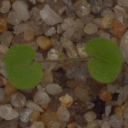

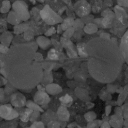

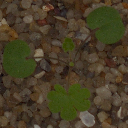

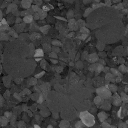

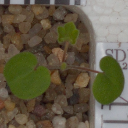

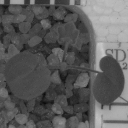

In [531]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(images_file, cv2.IMREAD_GRAYSCALE)
from google.colab.patches import cv2_imshow
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__
# Load the data into a df
data = np.load(images_file)
datagrey = np.empty
# load labels
Labels = pd.read_csv(labels_file)
# print a few photos to make sure they look as we expect
for i in range (3):
  grey = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY)
  cv2_imshow(data[i])
  cv2_imshow(grey)


Show the shape of the data (rows, HxWxC)

In [532]:
#print shape of the data
print(data.shape)


(4750, 128, 128, 3)


In [533]:
names = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
nameslen = len(names)
print(Labels.head())
df = Labels.copy()
#replaces label names with label values
df.replace(to_replace=labels,
           inplace=True)
# replace Labels Dataframe with int values dataframe
Labels = df
print(Labels.head())


                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill
   Label
0     10
1     10
2     10
3     10
4     10


Gaussian Blur an image! Used this link for reference:

-
https://opencv24-python-tutorials.readthedocs.io/en/stable/py_tutorials/py_imgproc/py_filtering/py_filtering.html

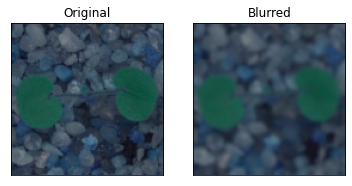

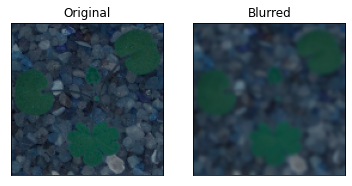

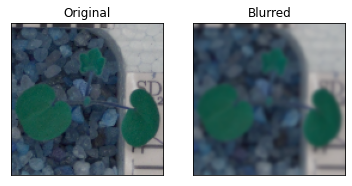

In [534]:

for i in range(3):
  blur = cv2.GaussianBlur(data[i],(7,7),0)
  plt.subplot(121),plt.imshow(data[i]),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
  plt.xticks([]), plt.yticks([])
  plt.show()

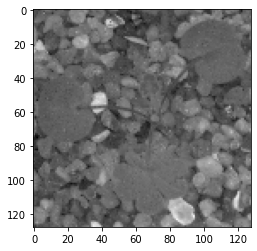

In [535]:
%matplotlib inline
plt.imshow(cv2.cvtColor(data[1], cv2.COLOR_BGR2GRAY), cmap='gray')

Normalization Step

In [536]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Labels, train_size=0.70, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [537]:
# Normalize the data
X_train = X_train.reshape(X_train.shape[0],128,128,3)
X_test = X_test.reshape(X_test.shape[0],128,128,3)


In [538]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [539]:
X_train.shape

(2493, 128, 128, 3)

In [540]:
X_test.shape

(1425, 128, 128, 3)

In [541]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (2493, 128, 128, 3)
Images in X_train: 2493
Images in X_test: 1425
Max value in X_train: 1.0
Min value in X_train: 0.0


In [542]:
print(y_train.shape)
print(y_test.shape)

(2493, 1)
(1425, 1)


In [543]:
labels = { "Black-grass":0,"Charlock":1,"Cleavers":2,"Common Chickweed":3,"Common wheat":4,"Fat Hen":5,"Loose Silky-bent":6,"Maize":7,
"Scentless Mayweed":8,"Shepherds Purse":9,"Small-flowered Cranesbill" :10,"Sugar beet":11}

In [544]:
print("Type:", type(Labels))
print(Labels)
#Troubleshooting error below
#labels = [0,1,2,3,4,5,6,7,8,9,10,11]

Type: <class 'pandas.core.frame.DataFrame'>
      Label
0        10
1        10
2        10
3        10
4        10
...     ...
4745      6
4746      6
4747      6
4748      6
4749      6

[4750 rows x 1 columns]


## Encode the Categories

In [545]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [546]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [547]:
fbatch_size = 50

model = models.Sequential()
# First Input
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
# CNN
model.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
# Dense and softmax layers
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_89 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_116 (Dropout)        (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 62, 62, 128)       36992     
_________________________________________________________________
batch_normalization_90 (Batc (None, 62, 62, 128)       512       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 31, 31, 128)     

In [548]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [549]:
model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"], 
              optimizer="adam")


In [550]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', min_delta=0.001, patience=10)

Epoch 1/20
78/78 [==============================] - 5s 52ms/step - loss: 7.2057 - accuracy: 0.1462
Epoch 2/20
78/78 [==============================] - 4s 50ms/step - loss: 2.1656 - accuracy: 0.2392
Epoch 3/20
78/78 [==============================] - 4s 50ms/step - loss: 2.0403 - accuracy: 0.2812
Epoch 4/20
78/78 [==============================] - 4s 51ms/step - loss: 1.9030 - accuracy: 0.3158
Epoch 5/20
78/78 [==============================] - 4s 50ms/step - loss: 1.8730 - accuracy: 0.3454
Epoch 6/20
78/78 [==============================] - 4s 50ms/step - loss: 1.7448 - accuracy: 0.3866
Epoch 7/20
78/78 [==============================] - 4s 50ms/step - loss: 1.7598 - accuracy: 0.4002
Epoch 8/20
78/78 [==============================] - 4s 50ms/step - loss: 1.6426 - accuracy: 0.4147
Epoch 9/20
78/78 [==============================] - 4s 50ms/step - loss: 1.5944 - accuracy: 0.4563
Epoch 10/20
78/78 [==============================] - 4s 50ms/step - loss: 1.4926 - accuracy: 0.4969
Epoch 11/

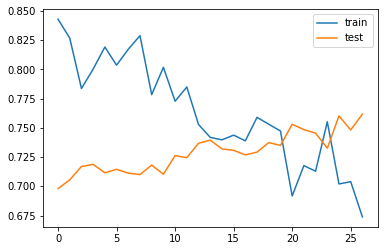

In [551]:
model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=20, callbacks=[early_stopping])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['accuracy'], label='test')
plt.legend()
plt.show()

In [552]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 1s 16ms/step - loss: 1.5790 - accuracy: 0.4477
Test loss: 1.5789647102355957
Test accuracy: 0.4477193057537079


In [553]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

clf.score(X_test, y_test)

y_pred = clf.predict(X_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)